In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('customer chun.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
df.isnull().sum().sum()

np.int64(0)

In [16]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [19]:
df["customerID"].duplicated().sum()

np.int64(0)

In [20]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"
df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

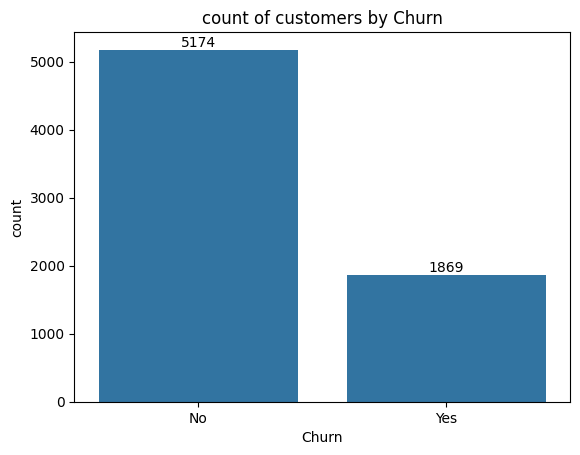

In [34]:
ax = sns.countplot(x = 'Churn' , data = df)

ax.bar_label(ax.containers[0])
plt.title("count of customers by Churn")
plt.show()

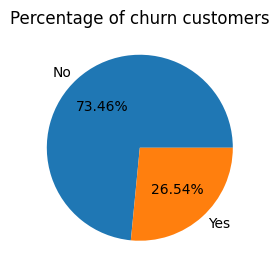

In [36]:
plt.figure(figsize = (3,4))
gb = df.groupby("Churn").agg({'Churn' : "count"})
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of churn customers")
plt.show()

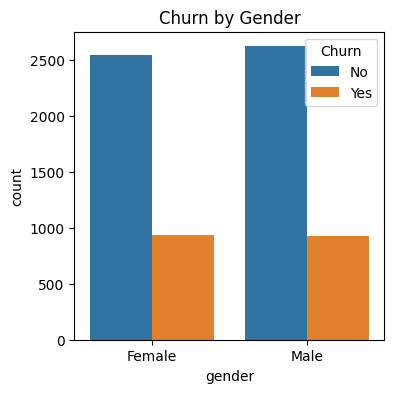

In [41]:
plt.figure(figsize = (4,4))
sns.countplot(x = "gender", data = df, hue = "Churn")
plt.title("Churn by Gender")
plt.show()

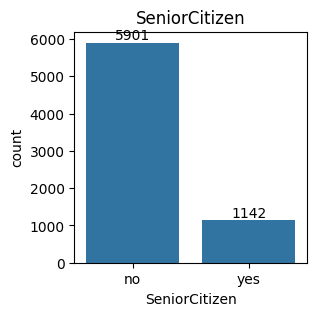

In [53]:
plt.figure(figsize = (3,3))
ax = sns.countplot(x = "SeniorCitizen", data = df)
ax.bar_label(ax.containers[0])
plt.title("SeniorCitizen")
plt.show()

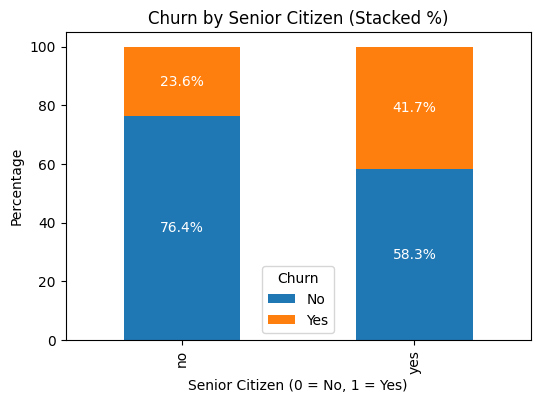

In [54]:
ct = pd.crosstab(df["SeniorCitizen"], df["Churn"], normalize="index") * 100  # Normalize to get percentage

# Define blue & orange colors
colors = ["#1f77b4", "#ff7f0e"]  # Blue & Orange (Matplotlib default)

# Plot stacked bar chart
ax = ct.plot(kind="bar", stacked=True, figsize=(6, 4), color=colors)

# Labels on bars
for bars in ax.containers:
    for bar in bars:
        height = bar.get_height()
        if height > 0:  # Only label non-zero bars
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_y() + height/2, f'{height:.1f}%', ha='center', va='center', color='white', fontsize=10)

# Titles and Labels
plt.title("Churn by Senior Citizen (Stacked %)")
plt.ylabel("Percentage")
plt.xlabel("Senior Citizen (0 = No, 1 = Yes)")
plt.legend(title="Churn", labels=["No", "Yes"])  # Rename labels if needed
plt.show()

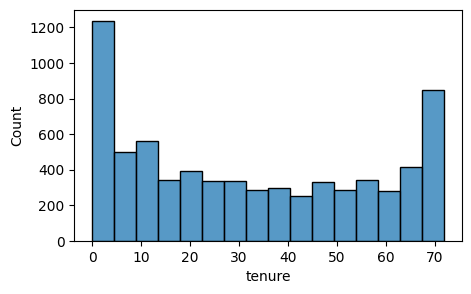

In [57]:
plt.figure(figsize = (5,3))
sns.histplot(x = "tenure", data = df)
plt.show()

#People who have use our services for a long time have stayed and people who have used our services 1 or 2 months have churned

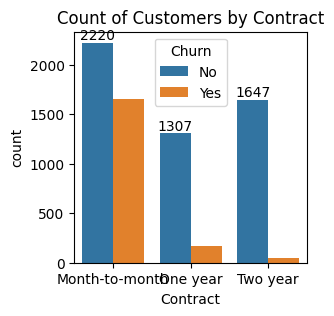

In [62]:
plt.figure(figsize = (3,3))
ax = sns.countplot(x = "Contract", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract")
plt.show()

In [63]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

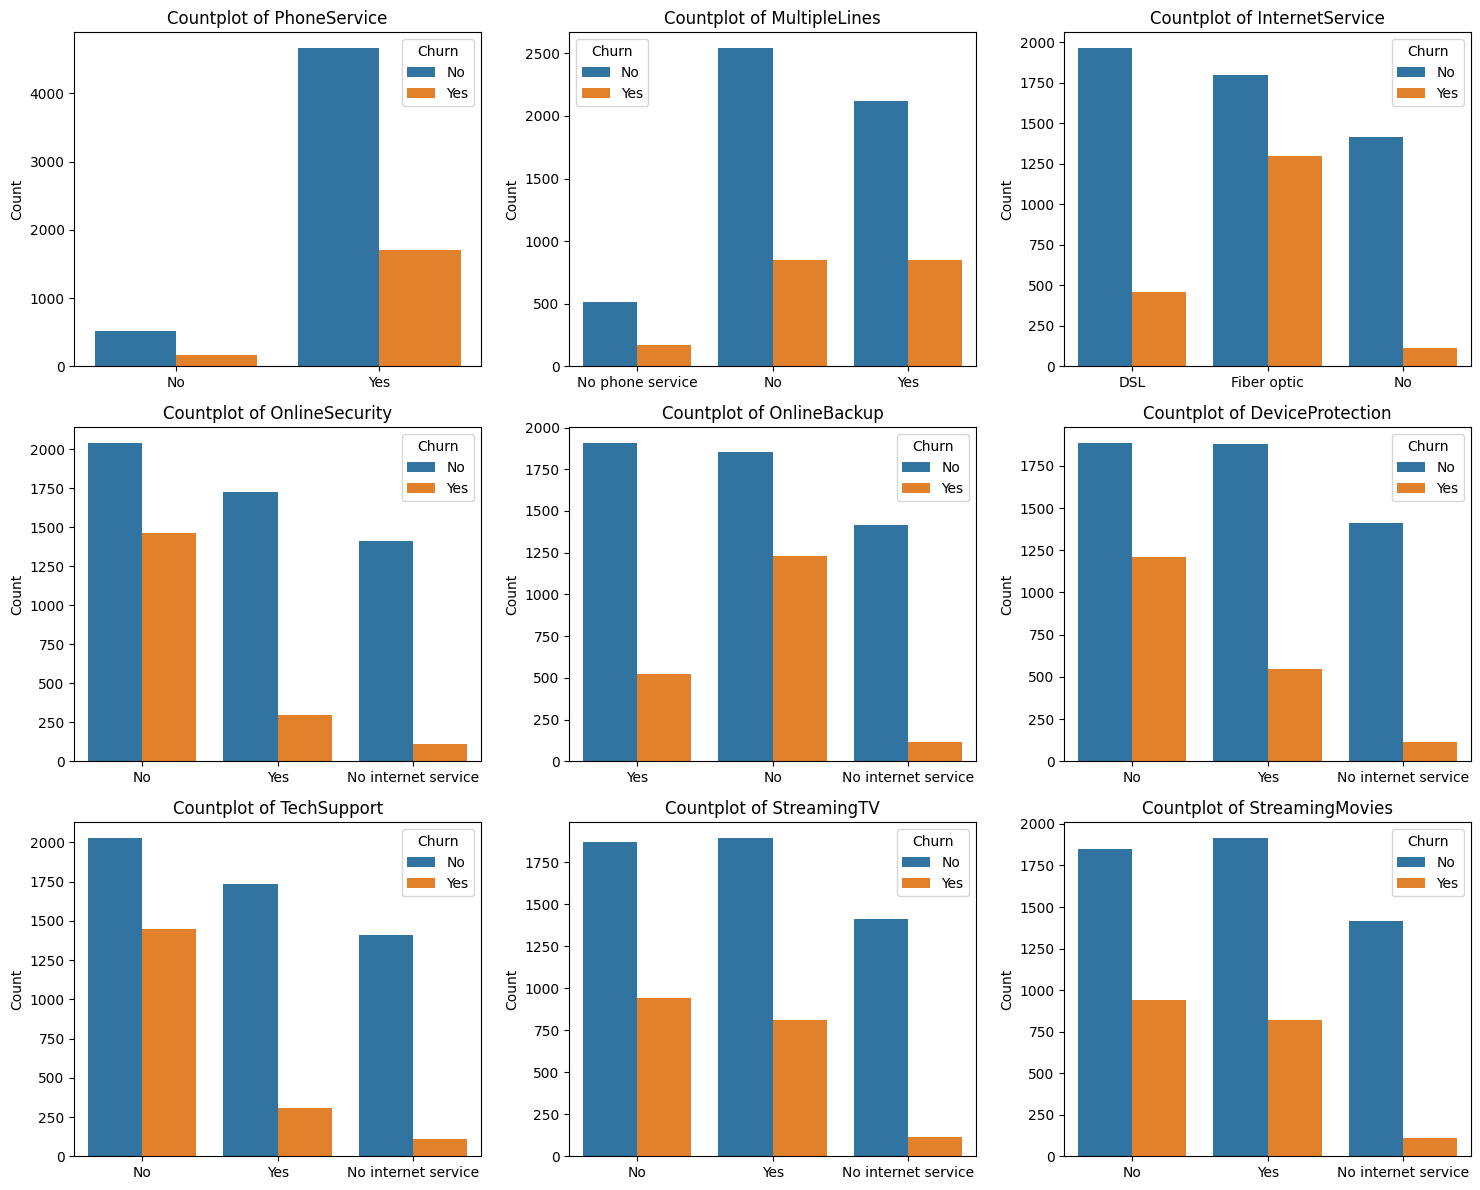

In [74]:
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Check for missing columns
missing_cols = [col for col in columns if col not in df.columns]
if missing_cols:
    print(f"❌ Missing Columns in df: {missing_cols}")
    raise ValueError("Some columns are missing from DataFrame!")

# Convert to categorical if needed
for col in columns:
    df[col] = df[col].astype(str)  # Ensure string categories

# Ensure DataFrame is not empty
if df.empty:
    raise ValueError("❌ DataFrame is empty! Check data loading process.")

# Define subplot grid
num_cols = len(columns)
rows = (num_cols // 3) + (num_cols % 3 > 0)  # Auto rows
fig, axes = plt.subplots(rows, 3, figsize=(15, 4 * rows))  # Grid setup

# Flatten subplot array
axes = axes.flatten()

# Define Custom Palette (Blue & Orange)
custom_palette = ["#1f77b4", "#ff7f0e"]  # Blue & Orange

# Create countplots with Custom Colors
for i, col in enumerate(columns):
    sns.countplot(x=df[col], ax=axes[i], hue=df["Churn"], palette=custom_palette)  # ✅ Custom Blue & Orange
    axes[i].set_title(f"Countplot of {col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")

# Remove empty subplots safely
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Remove extra axes safely

plt.tight_layout()
plt.show()

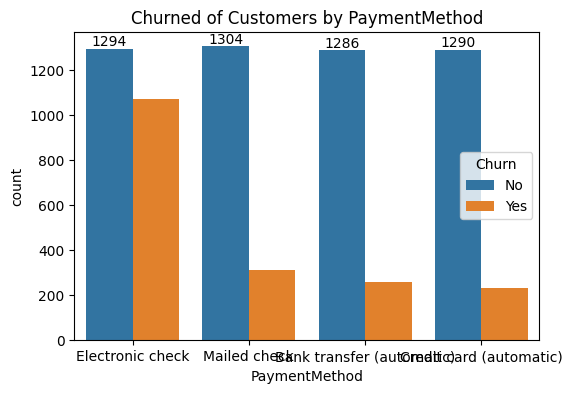

In [77]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Churned of Customers by PaymentMethod")
plt.show()